In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#data gathering
data=pd.read_csv(r"c:\Users\\acer\\Downloads\iris.csv")

In [3]:
#data preprocessing
data.drop(['Id'],axis=1,inplace=True)

In [4]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


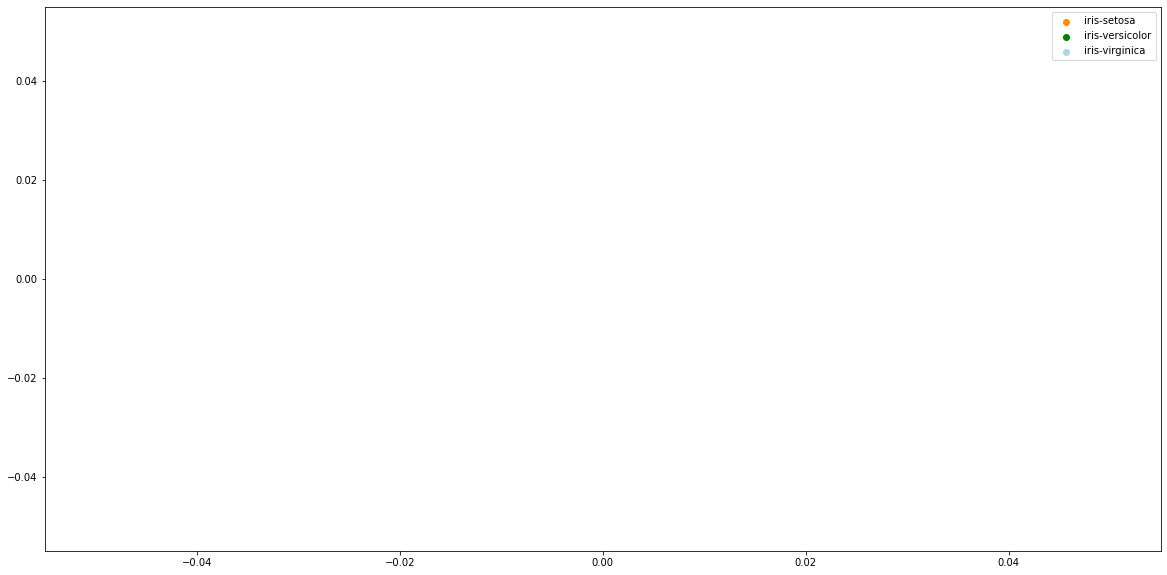

In [20]:
#visualize
iris_setosa=data[data[list(data.columns)[-1]]=='iris-setosa']
iris_versicolor=data[data[list(data.columns)[-1]]=='iris-versicolor']
iris_virginica=data[data[list(data.columns)[-1]]=='iris-virginica']

fig,axes = plt.subplots(1,1,figsize=(20,10))
axes.scatter(iris_setosa[['SepalLengthCm']],iris_setosa[['SepalWidthCm']],c='darkorange',label='iris-setosa')
axes.scatter(iris_versicolor[['SepalLengthCm']],iris_versicolor[['SepalWidthCm']],c='green',label='iris-versicolor')
axes.scatter(iris_virginica[['SepalLengthCm']],iris_virginica[['SepalWidthCm']],c='lightblue',label='iris-virginica')
axes.legend()
plt.show()

In [7]:
#labeling
from sklearn.preprocessing import LabelEncoder

x=data[list(data.columns)[:-1]]
y=data[list(data.columns)[-1]]

#initialize encoder
encoder=LabelEncoder()
encodedy=encoder.fit_transform(y)

#scaling features
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#initialize scaler
scaler=StandardScaler()
scaler.fit(x)
scaledx=scaler.transform(x)
scaledx

mxscaler=MinMaxScaler()
scaledx=mxscaler.fit_transform(x)




In [8]:
#split
from sklearn import model_selection
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(scaledx,encodedy,test_size=0.2,random_state=3)

In [9]:
#modeling
from sklearn import linear_model
#initialize
clf=linear_model.LogisticRegression()
#train model
clf.fit(xtrain,ytrain)
#test prediction
ypred=clf.predict(xtest)

ypred==ytest


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False])

In [10]:
#evaluate
from sklearn.metrics import f1_score,confusion_matrix

print("Confusion Matrix:\n ",confusion_matrix(ypred,ytest))
print("F1 Score: ",f1_score(ypred,ytest,average=None))

Confusion Matrix:
  [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
F1 Score:  [1.  0.9 0.9]


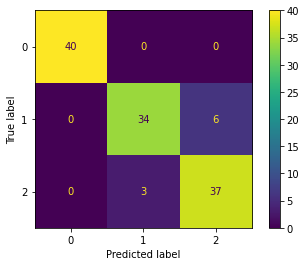

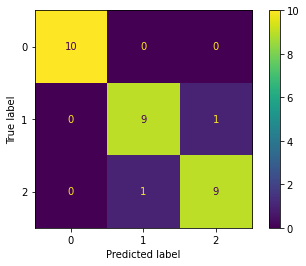

In [11]:
from sklearn import metrics

metrics.plot_confusion_matrix(clf,xtrain,ytrain)
metrics.plot_confusion_matrix(clf,xtest,ytest)

In [12]:
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import cross_val_score
cv = cross_val_score(
    clf,scaledx,encodedy,cv=5,scoring='accuracy'
)
cv.mean()

0.9266666666666665

In [13]:
linear_model.LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [14]:
#hyperperameter tuning
from sklearn.model_selection import RandomizedSearchCV

grid=linear_model.LogisticRegression()

gridmodel=RandomizedSearchCV(
    grid,
    param_distributions={
     'penalty':['l1','l2','elasticnet','None'],
     'C':np.logspace(1,5,100),
     'solver':['newton-cg','sag','lbfgs','liblinear'],
     'max_iter':list(range(100,3000,100))
    },
    cv=3,scoring='accuracy',n_iter=100,n_jobs=-1,verbose=3
)
gridmodel.fit(xtrain,ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e+01, 1.09749877e+01, 1.20450354e+01, 1.32194115e+01,
       1.45082878e+01, 1.59228279e+01, 1.74752840e+01, 1.91791026e+01,
       2.10490414e+01, 2.31012970e+01, 2.53536449e+01, 2.78255940e+01,
       3.05385551e+01, 3.35160265e+01, 3.67837977e+01, 4.03701726e+01,
       4....
       5.21400829e+04, 5.72236766e+04, 6.28029144e+04, 6.89261210e+04,
       7.56463328e+04, 8.30217568e+04, 9.11162756e+04, 1.00000000e+05]),
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600, 700, 800, 900, 1000,
                                                     1100, 1200, 1300, 1400,
                                                     1500, 1600, 1700, 1800,
                                                     1900, 2000, 2100, 2200,
                                              

In [15]:
gridmodel.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 2300, 'C': 25.353644939701113}

In [16]:
finalmodel=gridmodel.best_estimator_
finalmodel

LogisticRegression(C=25.353644939701113, max_iter=2300)

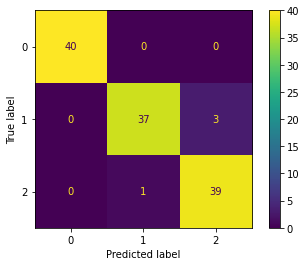

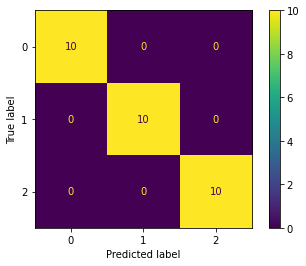

In [17]:
from sklearn import metrics

metrics.plot_confusion_matrix(finalmodel,xtrain,ytrain)
metrics.plot_confusion_matrix(finalmodel,xtest,ytest)

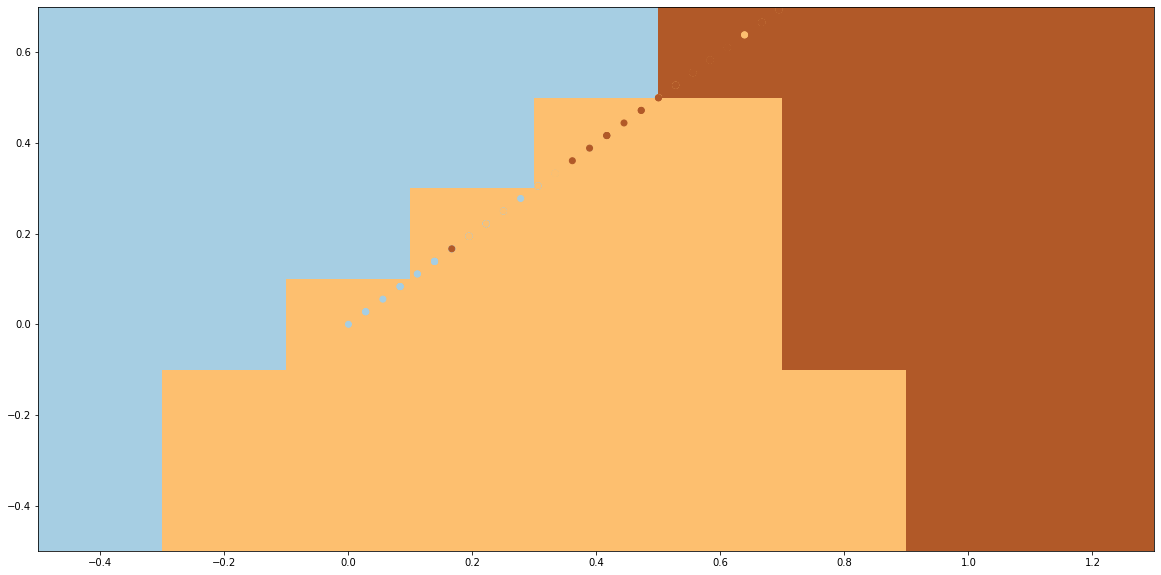

In [18]:
#analysis
clf=gridmodel.best_estimator_


clf.fit(scaledx[:,:2],encodedy)

xmin,xmax= scaledx[:,:2][:,0].min()-0.5,scaledx[:,:2][:,0].max()+0.5
ymin,ymax= scaledx[:,:2][:,:1].min()-0.5,scaledx[:,:2][0,:1].max()+0.5

xx,yy=np.meshgrid(np.arange(xmin,xmax,0.2),np.arange(ymin,ymax,0.2))
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
#color
z=z.reshape(xx.shape)
plt.figure(1,figsize=(20,10))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx,yy,z)
#plot
plt.scatter(scaledx[:,:2][:,0],scaledx[:,:2][:,:1],c=encodedy)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()